In [4]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn import preprocessing
import torch.utils.data
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [5]:
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieid', 'title', 'genre'])
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userid', 'movieid', 'rating'])

## Ratings

In [6]:
ratings.head()

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [4]:
ratings.shape

(1000209, 3)

In [7]:
ratings.describe()

,userid,movieid,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


## Movies

In [8]:
movies.head()

,movieid,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
print('Shape: ', movies.shape, '\n')
movies.info()

Shape:  (3883, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieid  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


##  Combining the Movies and Ratings DataFrame

In [9]:
df_combined = pd.merge(ratings, movies, on = 'movieid')

In [10]:
df_combined.head()

,userid,movieid,rating,title,genre
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


In [11]:
df_combined.shape

(1000209, 5)

# Visualizations on the Dataset

In [12]:
# hàm để tìm thể loại trong tập dữ liệu
genres = {}
def find_genres():
    for genre in movies['genre']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [13]:
genres

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

## Heavily Rated Movies

In [14]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


C:\Users\Nhien\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


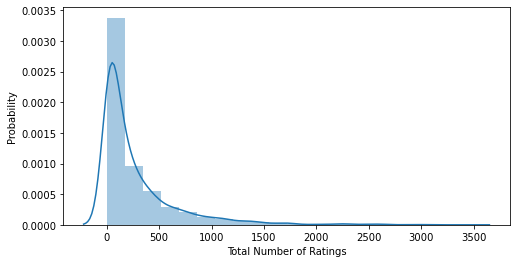

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

## Highly Rated Movies

In [15]:
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Ulysses (Ulisse) (1954),5.0,1
Lured (1947),5.0,1
Follow the Bitch (1998),5.0,1
Bittersweet Motel (2000),5.0,1
Song of Freedom (1936),5.0,1
One Little Indian (1973),5.0,1
Smashing Time (1967),5.0,2
Schlafes Bruder (Brother of Sleep) (1995),5.0,1
"Gate of Heavenly Peace, The (1995)",5.0,3


In [16]:
print('Số người dùng không đưa ra xếp hạng là 5,0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Số người dùng Cá nhân không có xếp hạng 5,0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Số người dùng không đưa ra xếp hạng là 5,0 :  10 

Số người dùng Cá nhân không có xếp hạng 5,0 :  8


C:\Users\Nhien\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


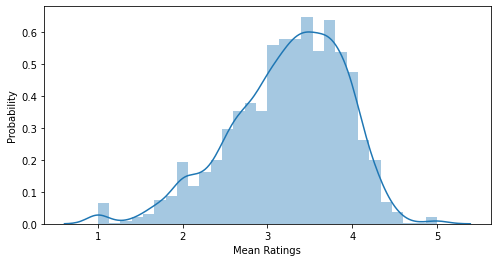

In [17]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

## Mean Ratings vs Total Number of Ratings

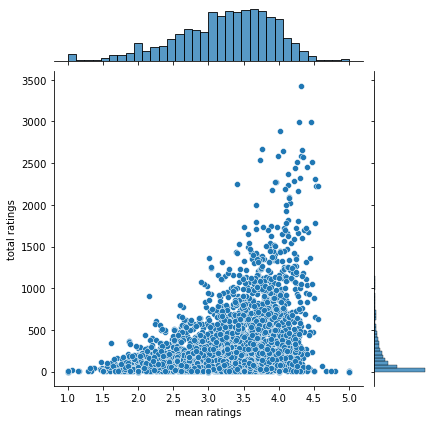

In [18]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

# Collaborative Filtering (CF)

**Collaborative filtering** là quá trình lọc thông tin hoặc mẫu bằng cách sử dụng các kỹ thuật liên quan đến sự cộng tác giữa nhiều tác nhân, quan điểm, nguồn dữ liệu. 

Có 2 cách tiếp cận CF ->

1) **Memory-Based CF** - Đây là một cách tiếp cận tìm ra sự tương đồng giữa những người dùng hoặc giữa các mặt hàng để giới thiệu các mặt hàng tương tự. Ví dụ bao gồm các đề xuất hàng đầu dựa trên CF dựa trên vùng lân cận và dựa trên mặt hàng / dựa trên người dùng.

2) **Model-Based CF** - Trong cách tiếp cận này, chúng tôi sử dụng các thuật toán khai thác dữ liệu, máy học khác nhau để dự đoán xếp hạng của người dùng đối với các mặt hàng chưa được xếp hạng. Ví dụ bao gồm Phân tích giá trị đơn lẻ (SVD), Phân tích thành phần chính (PCA), v.v.

## Create User-Item Matrix

In [15]:
util_mat = df_combined.pivot_table(index = 'userid', columns = 'title', values = 'rating')
util_mat.head(20)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Memory Based Collaborative Filtering

There are 2 approaches to Memory-Based CF -->

1) **User-User Collaborative Filtering** - Trong điều này, chúng tôi tính toán mức độ tương tự của tất cả người dùng với người dùng đang hoạt động (người dùng có dự đoán). Sau đó, sắp xếp và lọc N người dùng hàng đầu để đưa ra dự đoán cho người dùng đang hoạt động. Điều này thường rất hiệu quả nhưng tốn nhiều thời gian và nguồn lực.

2) **Item-Item Collaborative Filtering** - Điều này tương tự với CF Người dùng-Người dùng, chỉ là chúng tôi hiện tính toán mức độ giống nhau giữa các mặt hàng để đề xuất các mặt hàng tương tự. 

item-item CF nhanh hơn rất nhiều so với user-user CF. và thứ hai là hồ sơ người dùng thay đổi nhanh chóng và toàn bộ mô hình hệ thống phải được tính toán lại, trong khi xếp hạng trung bình của mặt hàng không thay đổi nhanh chóng và điều này dẫn đến phân phối xếp hạng ổn định hơn trong mô hình, vì vậy mô hình không phải được xây dựng lại như thường.

sử dụng độ đo Pearson Similarity để tính toán sự tương đồng

3) **Pearson Similarity** - Nó là sự tương đồng giữa Centered-Cosine. Chúng tôi trừ xếp hạng trung bình khỏi xếp hạng của người dùng, để giá trị trung bình được căn giữa bằng 0 và sau đó tính toán độ tương đồng của cosin.

### User based Collaborative Filtering

In [16]:
user_util_matrix = util_mat.copy()
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_util_matrix.head(5)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userid,,,,,,,,,,,,,,,,,,,,,
1,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,...,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679,4.188679
2,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,...,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178,3.713178
3,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,...,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961,3.901961
4,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,...,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476,4.190476
5,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,...,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465,3.146465


In [17]:
user_util_matrix.T.corr()

userid,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
userid,,,,,,,,,,,,,,,,,,,,,
1,1.000000e+00,0.032665,-0.032267,0.016359,-0.016774,0.045229,1.431447e-02,0.013465,0.061905,-0.004469,...,0.012852,0.034246,0.054216,-3.728633e-03,0.069408,-0.038463,0.000283,1.853070e-16,0.011725,0.005210
2,3.266455e-02,1.000000,0.023592,-0.016699,-0.032420,-0.019154,6.283506e-02,-0.002045,0.060978,-0.004654,...,-0.002849,0.012514,0.080611,-6.569508e-03,0.076127,0.088853,0.054506,-1.309591e-02,0.032720,-0.006562
3,-3.226747e-02,0.023592,1.000000,0.042521,-0.031153,-0.010965,5.789478e-02,-0.040328,-0.021620,0.003036,...,-0.016524,0.005764,-0.027753,-1.179788e-15,0.009517,0.028658,0.001249,4.640786e-02,0.048975,-0.041902
4,1.635891e-02,-0.016699,0.042521,1.000000,-0.002730,0.032028,-3.151033e-02,0.031002,0.021538,-0.038158,...,-0.038547,0.002558,-0.004579,7.525281e-16,-0.051202,0.043721,0.014981,-7.301069e-02,-0.011580,0.035714
5,-1.677388e-02,-0.032420,-0.031153,-0.002730,1.000000,-0.045909,9.392881e-03,0.045783,0.015280,-0.004929,...,0.019115,0.013596,0.000476,1.127001e-02,0.061089,0.049306,-0.023689,-3.528555e-02,0.017825,0.064367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-3.846341e-02,0.088853,0.028658,0.043721,0.049306,-0.037376,4.559392e-02,0.068462,0.038704,0.027861,...,0.002771,0.043403,0.069510,5.337622e-02,0.084315,1.000000,0.046758,-1.361941e-02,0.040512,0.112381
6037,2.827282e-04,0.054506,0.001249,0.014981,-0.023689,-0.025158,-2.435044e-02,-0.001524,0.048229,0.001987,...,-0.005739,0.067317,0.022541,1.209074e-02,0.033577,0.046758,1.000000,-1.522712e-02,0.051444,0.070909
6038,1.853070e-16,-0.013096,0.046408,-0.073011,-0.035286,-0.040051,-8.133679e-16,0.000440,0.031515,0.069391,...,-0.043571,-0.018585,0.046919,1.621040e-16,0.028166,-0.013619,-0.015227,1.000000e+00,0.043532,-0.039279


In [18]:
user_corr_mat = user_util_matrix.T.corr()
corr_user_1 = user_corr_mat.iloc[0]

In [20]:
corr_user_1.sort_values(ascending=False, inplace=True)

In [21]:
corr_user_1

userid
1       1.000000
1337    0.189242
379     0.159893
5404    0.155154
49      0.148455
          ...   
5642   -0.130646
2806   -0.136743
3787   -0.140132
2758   -0.146679
5028   -0.168499
Name: 1, Length: 6040, dtype: float64

In [22]:
corr_user_1.dropna(inplace = True)

In [23]:
top50_corr_users = corr_user_1[1:51]

In [24]:
df_combined[ df_combined['userid'] == 1]

,userid,movieid,rating,title,genre
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical
2250,1,914,3,My Fair Lady (1964),Musical|Romance
2886,1,3408,4,Erin Brockovich (2000),Drama
4201,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy
5904,1,1197,3,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
8222,1,1287,5,Ben-Hur (1959),Action|Adventure|Drama
8926,1,2804,5,"Christmas Story, A (1983)",Comedy|Drama
10278,1,594,4,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
11041,1,919,4,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


In [25]:
# user1 has not rated 32 movie
df_combined[ (df_combined['userid'] == 1) & (df_combined['movieid'] == 32) ] 

,userid,movieid,rating,title,genre


In [26]:
print('32nd Movie : ', movies['title'][ movies['movieid'] == 32 ].values)

32nd Movie :  ['Twelve Monkeys (1995)']


In [27]:
df_n_ratings.loc[['Twelve Monkeys (1995)']]

,mean ratings,total ratings
title,,
Twelve Monkeys (1995),3.945731,1511


In [28]:
top50_users = top50_corr_users.keys()

count = 0
users = list()
for user in top50_users:
    if df_combined[ (df_combined['userid'] == user) & (df_combined['movieid'] == 32) ]['rating'].sum()  :
        count +=1
        users.append(user)

print(count)

3


In [29]:
def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += top50_corr_users.loc[user] * df_combined[ (df_combined['userid'] == user) & 
                                                              (df_combined['movieid'] == 32) ]['rating'].sum()
        sum_similarity += top50_corr_users.loc[user]

    print(weighted_ratings / sum_similarity)
    
    
predict_rating()

3.448665906364768


In [30]:
movies[ movies['movieid'] == 32]


,movieid,title,genre
31,32,Twelve Monkeys (1995),Drama|Sci-Fi


### Item Based Collaborative Filtering

In [65]:
# Let's find similar movies to jurassic Park
df_n_ratings.loc[['Jurassic Park (1993)']]

,mean ratings,total ratings
title,,
Jurassic Park (1993),3.763847,2672


In [66]:
item_util_matrix = util_mat.copy()
item_util_matrix.head(10)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userid,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
item_util_matrix = item_util_matrix.apply(lambda col : col.fillna(col.mean()), axis=0)
item_util_matrix.head(5)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
userid,,,,,,,,,,,,,,,,,,,,,
1,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
2,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
3,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
4,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098
5,3.027027,3.371429,2.692308,2.910891,3.713568,2.5,3.422857,3.59646,3.046703,4.295455,...,3.632911,3.390501,3.3,3.376147,3.5,3.413793,3.750831,3.5,2.521739,3.256098


In [68]:
item_util_matrix.isna().sum().sum()

0

In [69]:
item_util_matrix.corr()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000e+00,5.425791e-03,2.176579e-04,2.374915e-04,1.153430e-02,4.133058e-15,-3.503016e-02,0.106339,2.612704e-02,-0.026918,...,8.210558e-03,-0.013066,8.740249e-16,-8.771392e-03,5.729771e-16,-1.617967e-02,0.002219,-2.309585e-15,1.242279e-02,-0.011893
'Night Mother (1986),5.425791e-03,1.000000e+00,-2.792036e-02,1.699714e-02,4.391634e-02,-1.287556e-15,1.735931e-02,0.033991,-1.050354e-02,0.023962,...,4.537118e-02,-0.013403,-1.637718e-04,-9.446899e-03,-8.191163e-16,-8.513289e-02,0.005007,3.669793e-15,-1.211629e-15,0.002673
'Til There Was You (1997),2.176579e-04,-2.792036e-02,1.000000e+00,1.066425e-01,3.943673e-02,-6.719412e-02,3.727369e-02,0.070025,7.165633e-02,0.028098,...,-2.786933e-03,0.001950,-8.543742e-16,2.469301e-03,-2.473120e-16,-3.137074e-03,0.019337,4.672566e-15,1.324870e-02,0.017444
"'burbs, The (1989)",2.374915e-04,1.699714e-02,1.066425e-01,1.000000e+00,6.961939e-03,-6.384217e-15,4.621458e-02,0.026934,2.755856e-02,0.010346,...,4.854277e-02,0.052684,-4.519952e-03,2.446586e-02,-1.629053e-15,1.550380e-03,0.009262,9.016159e-15,-1.718682e-02,0.020929
...And Justice for All (1979),1.153430e-02,4.391634e-02,3.943673e-02,6.961939e-03,1.000000e+00,-3.120009e-15,2.051382e-02,0.032768,-1.742993e-02,0.064177,...,-2.691141e-02,0.010570,7.538153e-02,1.408899e-02,-5.399955e-17,-7.458429e-02,0.024968,7.361906e-02,3.150148e-16,-0.003858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",-1.617967e-02,-8.513289e-02,-3.137074e-03,1.550380e-03,-7.458429e-02,5.894540e-15,1.334302e-02,-0.018098,3.914679e-02,0.004383,...,9.772459e-02,0.039842,3.164983e-02,-4.449327e-03,1.423426e-15,1.000000e+00,0.068563,-5.252257e-02,-8.012972e-16,0.042302
Zero Effect (1998),2.218665e-03,5.006971e-03,1.933716e-02,9.262368e-03,2.496772e-02,1.233995e-14,3.868833e-02,0.029620,-1.453458e-03,0.035649,...,2.362909e-02,0.015663,1.043393e-01,1.719161e-02,3.328886e-15,6.856268e-02,1.000000,4.889784e-02,3.431239e-04,0.093522
Zero Kelvin (KjÃ¦rlighetens kjÃ¸tere) (1995),-2.309585e-15,3.669793e-15,4.672566e-15,9.016159e-15,7.361906e-02,-1.472639e-14,6.370302e-15,0.012234,-6.063104e-16,0.024718,...,-1.660464e-01,0.024874,-5.490425e-15,-5.283558e-15,-4.831056e-15,-5.252257e-02,0.048898,1.000000e+00,1.311884e-15,0.022069


In [70]:
item_corr_matrix = item_util_matrix.corr()

In [71]:
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr = jurassic_park_corr.sort_values(ascending=False)
jurassic_park_corr.dropna(inplace=True)

In [72]:
movies_similar_to_jurassic_park = pd.DataFrame(data=jurassic_park_corr.values, columns=['Correlation'], 
                                               index = jurassic_park_corr.index)
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])
movies_similar_to_jurassic_park.head(10)

,Correlation,total ratings
title,,
Jurassic Park (1993),1.000000,2672
"Lost World: Jurassic Park, The (1997)",0.303369,1255
Independence Day (ID4) (1996),0.249913,1730
Men in Black (1997),0.213972,2538
Terminator 2: Judgment Day (1991),0.207469,2649
"Fugitive, The (1993)",0.199560,1995
Star Wars: Episode VI - Return of the Jedi (1983),0.187870,2883
Twister (1996),0.187025,1110
Star Wars: Episode I - The Phantom Menace (1999),0.179086,2250


In [73]:
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park[1:]
movies_similar_to_jurassic_park[ movies_similar_to_jurassic_park['total ratings'] > 100 ].sort_values(ascending=False,
                                                                                          by=['Correlation']).head(10)

,Correlation,total ratings
title,,
"Lost World: Jurassic Park, The (1997)",0.303369,1255
Independence Day (ID4) (1996),0.249913,1730
Men in Black (1997),0.213972,2538
Terminator 2: Judgment Day (1991),0.207469,2649
"Fugitive, The (1993)",0.199560,1995
Star Wars: Episode VI - Return of the Jedi (1983),0.187870,2883
Twister (1996),0.187025,1110
Star Wars: Episode I - The Phantom Menace (1999),0.179086,2250
Speed (1994),0.178730,1650


## Model Based Collaborative Filtering

In [13]:
n_users = ratings.userid.unique().shape[0]
n_movies = ratings.movieid.unique().shape[0]
print ('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies)) 

Number of users = 6040 | Number of movies = 3706


In [22]:
R = Ratings.values
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [23]:
Ratings = ratings.pivot(index = 'userid', columns ='movieid', values = 'rating').fillna(0)
Ratings.head()

movieid,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userid,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)
print ('The sparsity level of dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of dataset is 95.5%


## Singular value decomposition (SVD)

In [25]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [26]:
sigma = np.diag(sigma)

In [27]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [28]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movieid,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


In [52]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Nhận và sắp xếp các dự đoán của người dùng
    user_row_number = userID - 1 
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # ID người dùng bắt đầu từ 1
    
    # Lấy dữ liệu của người dùng và hợp nhất trong thông tin phim.
    user_data = original_ratings[original_ratings.userid == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieid', right_on = 'movieid').
                     sort_values(['rating'], ascending=False)
                 )

    print ('Người dùng {0} đã xếp hạng {1} phim.'.format(userID, user_full.shape[0]))
    print ('Đề xuất {0} phim có xếp hạng dự đoán cao nhất chưa được xếp hạng.'.format(num_recommendations))
     
    # Đề xuất các phim có xếp hạng dự đoán cao nhất mà người dùng chưa xem.
    recommendations = (movies[~movies['movieid'].isin(user_full['movieid'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieid',
               right_on = 'movieid').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

Let's try to recommend 20 movies for user with ID 1310.

In [53]:
already_rated, predictions = recommend_movies(preds, 1, movies, ratings, 20)

Người dùng 1 đã xếp hạng 53 phim.
Đề xuất 20 phim có xếp hạng dự đoán cao nhất chưa được xếp hạng.


In [36]:
already_rated.head(20)

,userid,movieid,rating,title,genre
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
46,1,1029,5,Dumbo (1941),Animation|Children's|Musical
40,1,1,5,Toy Story (1995),Animation|Children's|Comedy
18,1,3105,5,Awakenings (1990),Drama
41,1,1961,5,Rain Man (1988),Drama
23,1,527,5,Schindler's List (1993),Drama|War
37,1,1022,5,Cinderella (1950),Animation|Children's|Musical
14,1,1035,5,"Sound of Music, The (1965)",Musical
25,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance
45,1,1028,5,Mary Poppins (1964),Children's|Comedy|Musical


In [37]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movieid,title,genre
311,318,"Shawshank Redemption, The (1994)",Drama
32,34,Babe (1995),Children's|Comedy|Drama
356,364,"Lion King, The (1994)",Animation|Children's|Musical
1975,2081,"Little Mermaid, The (1989)",Animation|Children's|Comedy|Musical|Romance
1235,1282,Fantasia (1940),Animation|Children's|Musical
1974,2080,Lady and the Tramp (1955),Animation|Children's|Comedy|Musical|Romance
1972,2078,"Jungle Book, The (1967)",Animation|Children's|Comedy|Musical
1990,2096,Sleeping Beauty (1959),Animation|Children's|Musical
1981,2087,Peter Pan (1953),Animation|Children's|Fantasy|Musical
348,356,Forrest Gump (1994),Comedy|Romance|War


## Model Evaluation

In [41]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import GridSearchCV, cross_validate
# Load Reader library
reader = Reader(rating_scale=(0.5, 5.0))

# Load ratings dataset with Dataset library
data = Dataset.load_from_df( ratings[['userid', 'movieid', 'rating']], reader = reader )


In [42]:
algo = SVD()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8738  0.8719  0.8728  0.8742  0.8749  0.8735  0.0011  
Fit time          108.29  109.57  106.76  111.42  108.95  109.00  1.53    
Test time         5.66    4.23    3.89    4.70    4.06    4.51    0.64    


{'test_rmse': array([0.87378315, 0.87188629, 0.87283376, 0.87423966, 0.87493284]),
 'fit_time': (108.28654742240906,
  109.56786036491394,
  106.76261329650879,
  111.42149043083191,
  108.95472455024719),
 'test_time': (5.664712905883789,
  4.227598190307617,
  3.887521982192993,
  4.696428298950195,
  4.059941291809082)}

#### Fine Tuning SVD using GridSearchCV
[Click here to view the parameters](https://surprise.readthedocs.io/en/stable/matrix_factorization.html)

In [43]:
param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score RMSE :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')


###############
Best Score RMSE : 0.8805931112537632
Best Parameters : {'n_factors': 75, 'lr_all': 0.05, 'reg_all': 0.06}
###############


In [46]:
trainset = data.build_full_trainset()
algo.trainset

In [54]:
ratings[ratings['userid'] == 1]

,userid,movieid,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
5,1,1197,3
6,1,1287,5
7,1,2804,5
8,1,594,4
9,1,919,4


Tính mức độ đánh giá của user 1 cho bộ phim có ID 1994

In [55]:
algo.predict(1, 1994)

Prediction(uid=1, iid=1994, r_ui=None, est=4.047138514783525, details={'was_impossible': False})